# Análisis Exploratorio de Datos - PetMind 

## Descripción General
PetMind es una empresa minorista de productos para mascotas con sede en Estados Unidos, que vende productos que son una combinación de artículos de lujo (juguetes) y artículos de uso diario (comida). 
La empresa busca aumentar las ventas vendiendo más productos de uso diario de forma repetida a sus usuarios y han implementado nuevas estrategias durante el último año para alcanzar este fin. Ahora, la empresa solicita un informe sobre cómo las compras repetidas afectan las ventas.

## Conjunto de Datos
El conjunto de datos contiene los registros de ventas en las tiendas el año pasado.
Consideraciones: 

+ product_id: Nominal. El identificador único del producto. No es posible que falten valores debido a la estructura de la base de datos.
+ Category: Nominal. La categoría del producto, uno de 6 valores (Vivienda, Alimentos, Juguetes, Equipos, Medicamentos, Accesorios). Los valores faltantes deben reemplazarse por “Unknown”.
+ animal: Nominal. El tipo de animal al que va dirigido el producto. Puede ser perro, gato, pez o pájaro. Los valores faltantes deben reemplazarse por “Unknown”.
+ size: ordinal. El tamaño del animal al que va dirigido el producto. Pequeño, mediano, grande. Los valores faltantes deben reemplazarse por “Unknown”.
+ price: Continuo. El precio al que se vende el producto. Puede ser cualquier valor positivo redondeado a 2 decimales. Los valores faltantes deben reemplazarse con el precio medio general.
+ sales: Continuo. El valor de todas las ventas del producto en el último año.Puede ser cualquier valor positivo, redondeado a 2 decimales. Los valores faltantes deben reemplazarse con la mediana general de las ventas.
+ rating: Discreto. Calificación del cliente del producto de 1 a 10. Los valores faltantes deben reemplazarse por 0.
+ repeat_purchase: Nominal. Si los clientes compran repetidamente el producto (1) o no (0) Los valores faltantes deben eliminarse.

## Tareas

1. Para cada columna de los datos, verifique que los valores coinciden con la descripción dada e indique la cantidad de valores faltantes en cada caso.
              
2. Cree una visualización que muestre cuántos registros son compras repetidas. Use la visualización para:

    + Indique qué categoría la variable compras repetidas tiene la mayor cantidad de observaciones
    + Explique si las observaciones están equilibradas en todas las categorías de la variable compras repetidas.   
    
   
3. Describa la distribución de todas las ventas. Su respuesta debe incluir una visualización que muestre la distribución.


4. Describa la relación entre las compras repetidas y las ventas. Su respuesta debe incluir una visualización para demostrar la relación.

### Desarrollo


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('pet_supplies_2212.csv')

In [3]:
#Inspección de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1500 non-null   int64  
 1   category         1500 non-null   object 
 2   animal           1500 non-null   object 
 3   size             1500 non-null   object 
 4   price            1500 non-null   object 
 5   sales            1500 non-null   float64
 6   rating           1350 non-null   float64
 7   repeat_purchase  1500 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 93.9+ KB


In [4]:
df.isna().sum()

product_id           0
category             0
animal               0
size                 0
price                0
sales                0
rating             150
repeat_purchase      0
dtype: int64

In [5]:
df.head()

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,large,51.1,1860.62,7.0,1
1,2,Housing,Bird,MEDIUM,35.98,963.60,6.0,0
2,3,Food,Dog,medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1


A partir de la inspección del conjunto de datos, se establece que solo se encuentran valores nulos en la variable 'rating' y es necesario modificar el tipo de dato de las variables: 'category','animal','size'y'rating' para hacer coincider cada variable con las consideraciondes de la base de datos.

### Limpieza de datos

De acuerdo a las características que debe cumplir cada variable según la instrucción, se realizan las modificaciones correspondientes en cada caso para garantizar la integridad de los datos:

In [6]:
# Category
df['category'].unique()

array(['Food', 'Housing', 'Medicine', 'Toys', 'Equipment', 'Accessory',
       '-'], dtype=object)

In [7]:
df['category'].replace('-','Unknown', inplace=True)
df['category'] = df['category'].astype('category')
print(f"Valores únicos en la variable category: {df['category'].cat.categories.tolist()}")

Valores únicos en la variable category: ['Accessory', 'Equipment', 'Food', 'Housing', 'Medicine', 'Toys', 'Unknown']


In [8]:
# animal
df['animal'] = df['animal'].astype('category')
print(f"Valores únicos de la variable animal: {df['animal'].cat.categories.tolist()}")

Valores únicos de la variable animal: ['Bird', 'Cat', 'Dog', 'Fish']


In [9]:
# size
df['size'].unique()

array(['large', 'MEDIUM', 'medium', 'small', 'Small', 'Large', 'SMALL',
       'Medium', 'LARGE'], dtype=object)

In [10]:
df['size'] = df['size'].astype(str).str.lower()
df['size'] = df['size'].astype('category')
print(f"valores únicos de la variable size: {df['size'].cat.categories.tolist()}")

valores únicos de la variable size: ['large', 'medium', 'small']


In [11]:
# price 
df['price'].unique()
df['price'].replace('unlisted', np.nan, inplace=True)
df['price']= df['price'].astype('float')
df['price'] = df['price'].fillna(df['price'].mean()).round(2)

In [12]:
#rating
df['rating'].dtype
df['rating'].unique()
df['rating'] = (df['rating'].fillna(0)).astype('int')

In [13]:
#repeat_purchase
df['repeat_purchase']=df['repeat_purchase'].astype('category')
print(f'Valores únicos de la variable repeat_purchase: {df.repeat_purchase.cat.categories.tolist()}')

Valores únicos de la variable repeat_purchase: [0, 1]


Una vez realizadas las modificaciones correspondientes se realiza una segunda inspección al conjunto de datos para asegurar el cumpliemiento de las reglas según el esquema de la base de datos:

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   product_id       1500 non-null   int64   
 1   category         1500 non-null   category
 2   animal           1500 non-null   category
 3   size             1500 non-null   category
 4   price            1500 non-null   float64 
 5   sales            1500 non-null   float64 
 6   rating           1500 non-null   int32   
 7   repeat_purchase  1500 non-null   category
dtypes: category(4), float64(2), int32(1), int64(1)
memory usage: 47.8 KB


### Visualizaciones

1. Número de observaciones que corresponden a compras repetidas:

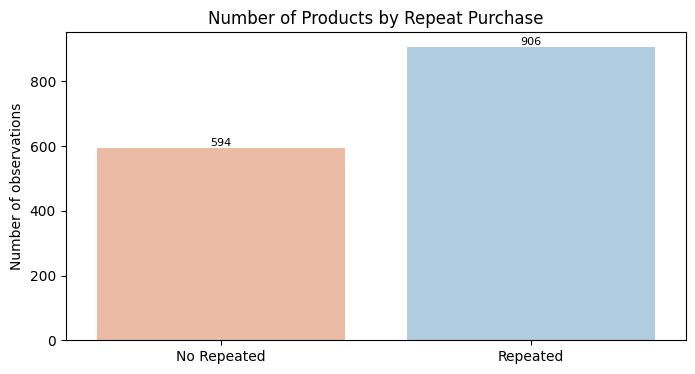

In [15]:
fig, ax = plt.subplots(figsize=(8,4))
ax = sns.countplot(data =df, x='repeat_purchase',hue='repeat_purchase', palette = 'RdBu', legend=False)
plt.xticks(ticks =[0,1], labels=['No Repeated', 'Repeated'])
plt.title('Number of Products by Repeat Purchase')
plt.ylabel('Number of observations')
plt.xlabel('')
for container in ax.containers:
    ax.bar_label(container, labels=[int(height.get_height()) for height in container], fontsize=8)

plt.show()

In [16]:
#Porcentaje de ventas
df.repeat_purchase.value_counts(normalize=True)*100

repeat_purchase
1    60.4
0    39.6
Name: proportion, dtype: float64

El número de registros que corresponden a compras repetidas de artículos de PetMind es 906 y corresponde al 60.4% del total del ventas de la compañía.

2. Categoría de productos con mayor número de compras repetidas:

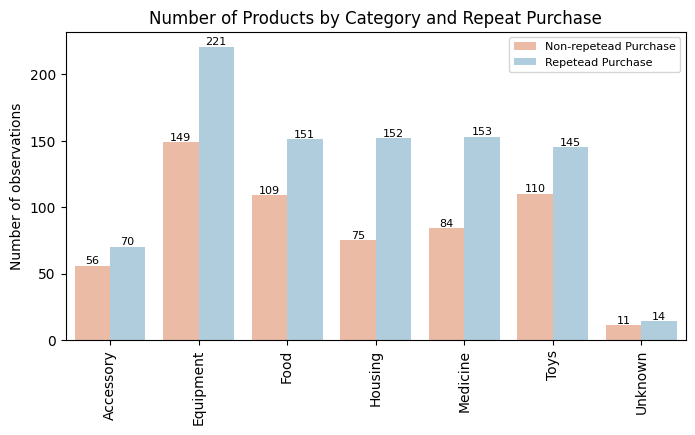

In [17]:
fig, ax = plt.subplots(figsize=(8,4))
ax= sns.countplot(data = df, x='category', hue='repeat_purchase', palette = 'RdBu')
plt.xticks(rotation=90)
plt.title('Number of Products by Category and Repeat Purchase')
plt.ylabel('Number of observations')
plt.xlabel('')
plt.legend(labels=['Non-repetead Purchase','Repetead Purchase'], fontsize=8)
for container in ax.containers:
    ax.bar_label(container, labels=[int(bar.get_height()) for bar in container], fontsize=8)
plt.show()

In [18]:
#Porcentaje número de ventas categoría 'Food'
df[df['category']=='Food']['repeat_purchase'].value_counts(normalize=True).round(2).mul(100)

repeat_purchase
1    58.0
0    42.0
Name: proportion, dtype: float64

In [19]:
#Total ventas por categoría - compras repetidas o no
cat_repurchase = pd.crosstab(df.category, df.repeat_purchase, values = df.sales, aggfunc='sum')
cat_repurchase.columns = ['Non-repeated', 'Repeated']
cat_repurchase.sort_values(by='Repeated', ascending=False)

,Non-repeated,Repeated
category,,
Equipment,143461.97,205413.27
Toys,139865.35,180031.75
Food,120317.11,166821.05
Medicine,79429.19,134637.06
Housing,57299.10,118031.21
Accessory,57873.72,63399.72
Unknown,12604.16,15712.11


De acuerdo a los resultados, se establece que 'Equipment' es la categoría con mayor número de ventas repetidas, con un valor total de 205413.27 USD. Por su parte, los productos de la categoría 'Food', considerados como de uso diario, presentan un margen de diferencia del 16% entre compras repetidas o no y se encuentra en el tercer lugar en lo referente a ingresos con 166821.05 USD para compras repetidas y 120317.11 USD para compras aisladas.

3. Distribución de la totalidad de las ventas de PetMind:

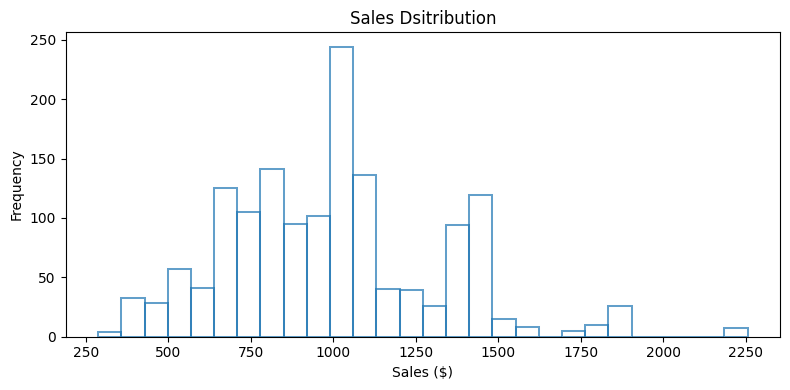

In [20]:
fig, ax = plt.subplots(figsize=(8,4))
ax = sns.histplot(data = df, x='sales', alpha =0.7, fill=False)
plt.title('Sales Dsitribution')
plt.ylabel('Frequency')
plt.xlabel('Sales ($)')
plt.tight_layout()
plt.show()

In [59]:
#Resumen estadístico monto de ventas
df.sales.describe().round(2)

count    1500.00
mean      996.60
std       323.95
min       286.94
25%       747.42
50%      1000.83
75%      1158.16
max      2255.96
Name: sales, dtype: float64

Las ventas de la compañía presentan una distribución sesgada a la derecha, es decir la mayoría de la ventas ocurre en el rango medio bajo independientemente del tipo de compra. En general, las ventas con mayor frecuencia son aquellas por valores cercanos a los 1000 USD. El número de ventas más allá de 1500 USD es bajo y podría atribuirse a los productos de gama premium.

4. Distribución del número de ventas por tipo de compra

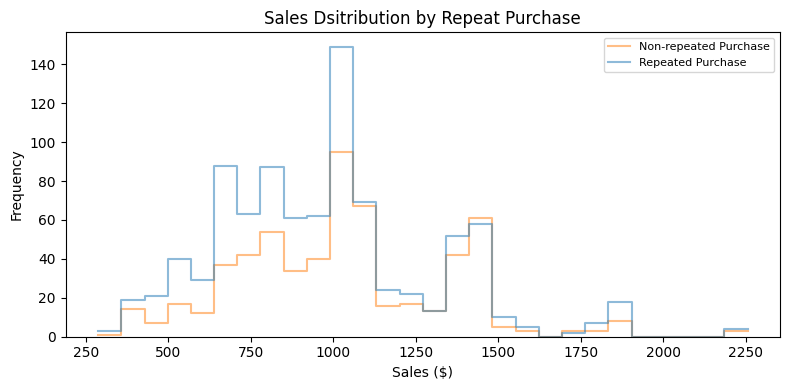

In [22]:
fig, ax = plt.subplots(figsize=(8,4))
ax = sns.histplot(data = df, x='sales', hue='repeat_purchase', hue_order =[1,0], alpha =0.5, element='step', fill=False)
plt.title('Sales Dsitribution by Repeat Purchase')
plt.ylabel('Frequency')
plt.xlabel('Sales ($)')
plt.legend(labels =['Non-repeated Purchase', 'Repeated Purchase'], fontsize=8)
plt.tight_layout()
plt.show()

A partir de la distribuión de las ventas por compras repetidas o no, se establece que en general, salvo por un caso particular cercano a los 1400 USD, para todos los montos, la frecuencia de las ventas para compras repetidas es mayor.

5. Distribución del monto de venta por tipo de compra

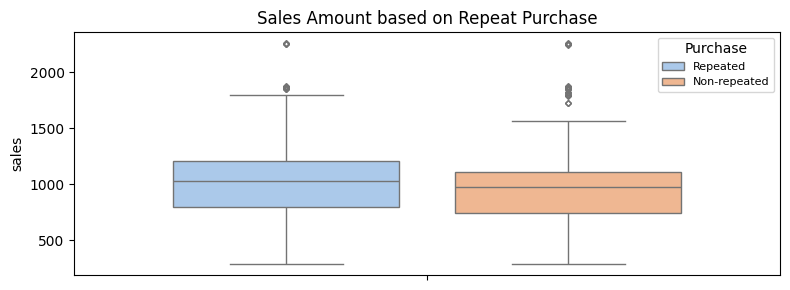

In [23]:
df['repeat_purchase'] = pd.Categorical(df['repeat_purchase'], categories=[0, 1], ordered=True)
fig, ax = plt.subplots(figsize=(8,3))
ax = sns.boxplot(data=df, y='sales', hue='repeat_purchase',hue_order=[0,1], palette='pastel',gap=0.2,  flierprops=dict(marker='D', markersize=3), dodge=True, width=0.8)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=handles, labels=['Repeated','Non-repeated'], title='Purchase', fontsize=8)
plt.title('Sales Amount based on Repeat Purchase')
plt.tight_layout()
plt.show()

In [60]:
#Resumen estadístico monto de ventas por tipo de compra
Summary = df.groupby('repeat_purchase')['sales'].describe().T.round(2)
Summary.columns = ['non-repeat', 'repeat']
Summary

,non-repeat,repeat
count,594.00,906.00
mean,1028.37,975.77
std,316.92,326.99
min,288.01,286.94
25%,795.74,738.45
50%,1030.18,978.21
75%,1208.89,1112.01
max,2254.99,2255.96


In [25]:
#Rango intercuartílico monto ventas repetidas
IQR_RP = (df[df['repeat_purchase'] == 1]['sales'].quantile(0.75) - df[df['repeat_purchase'] == 1]['sales'].quantile(0.25)).round(2)
IQR_RP

373.55

In [26]:
#Rango intercuartílico monto ventas no repetidas
IQR_NRP = (df[df['repeat_purchase'] == 0]['sales'].quantile(0.75) - df[df['repeat_purchase'] == 1]['sales'].quantile(0.25)).round(2)
IQR_NRP

470.44

In [58]:
#Porcentaje monto de ventas por tipo de compra
(df.groupby('repeat_purchase')['sales'].sum() / df.sales.sum()).round(2).mul(100)

repeat_purchase
0    41.0
1    59.0
Name: sales, dtype: float64

En relación a monto de las ventas, las compras repetidas representan el 59% de los ingresos de la compañía. La diferencia en el valor medio de las compras repetidas o no es del alrededor de 50 USD. De acuerdo al resumen estadístico, no se presentan diferencias marcadas entre valores maxímos y mínimos de compra en ambas categorías. Sin embargo, el monto de las ventas presentan mayor disperción para compras aisladas o no repetidas con una diferencia de 470.44 USD frente a 373.55 USD para compras repetidas. Los valores atípicos en el monto de ventas se pueden atribuir a las compras menos recurrentes de productos de lujo o gama premium.

### Análisis adicional por categorías

6. Rating de ventas por tipo de compra

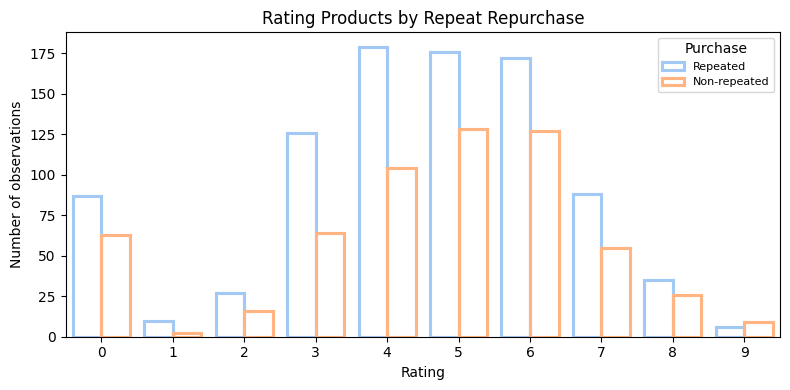

In [28]:
#Compras repetidas y Rating de productos PetMind
fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(df, x=df.rating, hue='repeat_purchase', hue_order=[1,0], fill=False, palette='pastel')
plt.legend(labels=['Repeated', 'Non-repeated'], title='Purchase', fontsize=8)
plt.ylabel('Number of observations')
plt.xlabel('Rating')
plt.title('Rating Products by Repeat Repurchase')
plt.tight_layout()
plt.show()

Según la calificación aportada por los clientes para los productos de PetMind, se determina que los productos con mayor número de ventas son aquellos con calificaciones entre 4-6 puntos. Salvo para una puntuación de 9, el número de ventas es superiror para compras repetidas en todos los casos. Por otro lado, productos con calificación '0' presentan ventas superiores a aquellos con calificaión  8 o 9, los productos con esta calificación registran ventas similares a los productos con calificación 7. Se precisa, modificar las consideraciones de la base de datos tenidas en cuenta para productos sin calificación en caso de querer utilizar la puntuación de los productos de la compañía para mejorar la estrategía de ventas.

7. Ventas por Mascota y tipo de compra

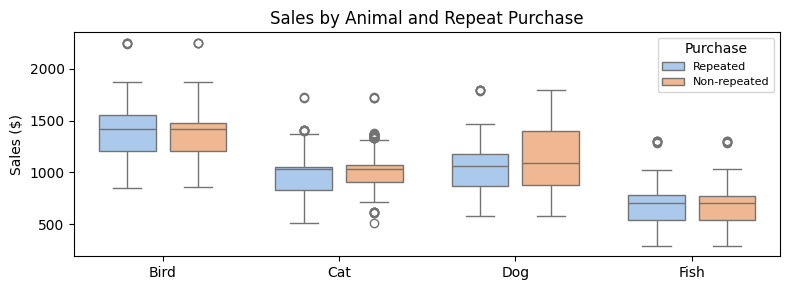

In [32]:
fig, ax = plt.subplots(figsize=(8,3))
sns.boxplot(df, x=df.animal , y =df.sales, hue='repeat_purchase', palette='pastel', gap=.2, hue_order=[1,0])
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=handles, labels=['Repeated', 'Non-repeated'], title='Purchase', fontsize=8)
plt.title('Sales by Animal and Repeat Purchase')
plt.ylabel('Sales ($)')
plt.xlabel('')
plt.tight_layout()
plt.show()

In [57]:
# Número y monto de ventas por tipo de mascota y compra repetida (1) o no (0)
df.groupby(['animal','repeat_purchase'])['sales'].agg(['count','sum'])

count        sum
animal repeat_purchase                  
Bird   0                   86  118705.07
       1                  111  156294.92
Cat    0                  223  230860.97
       1                  344  343371.16
Dog    0                  159  172408.16
       1                  208  215997.59
Fish   0                  126   88876.40
       1                  243  168382.50

In [52]:
#Porcentaje número de ventas por tipo de mascota
df.animal.value_counts(normalize=True).mul(100).round(0)

animal
Cat     38.0
Fish    25.0
Dog     24.0
Bird    13.0
Name: proportion, dtype: float64

Los clientes con aves como mascotas son quienes hacen compras con montos más elevados seguidos de aquellos que tienen perros. Para estos últimos, la disperción de los montos de ventas es mucho mayor para compras aisladas, caso contrario a las compras para gatos que presentan la menor dispersión de todo el grupo, es decir precios más compactos en sus productos. Excluidos los valores atípicos, el costo máximo de las compras para peces es inferior al valor medio de compras para  otro tipo de mascotas.

En lo que respecta al número y monto de las ventas, los principales clientes de Petmind tienen gatos como mascotas y registran 567 ventas (38% del total de ventas) por un valor de 57423.13 USD de los cuales 343371.16 UDS corresponden a compras repetidas. En todos los casos el número y monto de las ventas es mayor para compras repetidas.

8. Ventas por tamaño de producto y tipo de compra

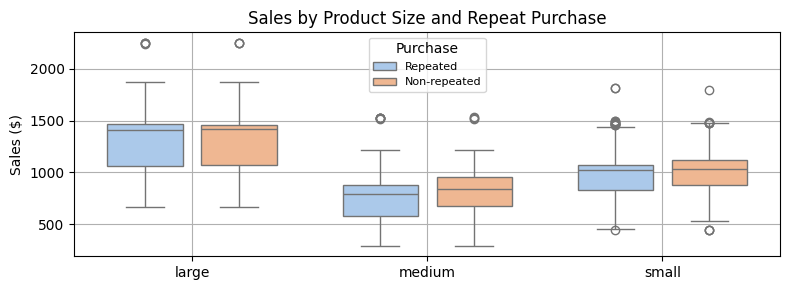

In [34]:
fig, ax = plt.subplots(figsize=(8,3))
sns.boxplot(df, x=df['size'] , y =df.sales, hue='repeat_purchase', palette='pastel', gap=.2, hue_order=[1,0])
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=handles, labels=['Repeated', 'Non-repeated'], title='Purchase', fontsize=8)
plt.title('Sales by Product Size and Repeat Purchase')
plt.ylabel('Sales ($)')
plt.xlabel('')
plt.grid()
plt.tight_layout()
plt.show()

In [45]:
#Número y monto de ventas por tipo de mascota para ventas repetidas (1) o no (0)
df.groupby(['size', 'repeat_purchase'])['sales'].agg(['count','sum'])

count        sum
size   repeat_purchase                  
large  0                  104  142408.58
       1                  150  202240.23
medium 0                  182  149522.21
       1                  310  239430.20
small  0                  308  318919.81
       1                  446  442375.74

In [56]:
#Porcentaje número de ventas por tamaño
df['size'].value_counts(normalize=True).mul(100).round(0)

size
small     50.0
medium    33.0
large     17.0
Name: proportion, dtype: float64

En PetMind predominan las ventas de productos de tamaño pequeño, con un total de 754 ventas que corresponden al 50% del número total de ventas, por un valor total de 761295.55 USD. Los productos de tamaño grande presentan la mayor dispersión en los montos, seguido de los productos pequeños y medianos. No se aprecia una diferencia muy marcada en la disperción de los montos de venta según el tamaño del producto para cada tipo de compra, salvo para el tamaño mediano donde los compras aisladas presentan un costo ligeramente superior. En todos los casos el número y monto de las ventas es mayor para las compras repetidas.

### Conclusiones
Conocida la estrategía de la compañía de apostar por incrementar el número de ventas repetidas, como medida inicial es necesario redefinir los criterios de la base de datos bajo lo consigna de obtener mayor conocimiento sobre los productos con mayor popularidad bien sea para enfocar la estrategía de ventas hacia estos productos o por el contrario para mejorar el marketing de aquellos con poco reconocimiento. En este sentido, los productos sin rating deberan ser excluidos del análisis y no otorgarles una calificación de cero. Por otro lado, teniendo en cuenta la distribución de los montos de ventas, se recomienda diversificar la oferta de productos con precios cercanos o inferiores a 1000 USD para estar acorde con la capacidad de compra del cliente objetivo, sin dejar de lado la oferta de productos de lujo. Ahora bien, en lo que respecta al publico objetivo, los clientes con gatos como mascotas son los más asiduos compradores de la tienda, junto con aquellos que prefieren los productos de tamaño pequeño. En primera instancia la estrategía de ventas para incrementar el número de ventas repetidas, debe estar enfocada hacia los productos con mayor puntuación, de bajo precio y tamaño pequeño.